In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# MAC OS 한글 폰트
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')


In [1]:
import matplotlib as mpl
 
# Colab 한글폰트 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,585 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

In [4]:
# Colab 한글폰트 문제 해결
plt.rc('font', family='NanumBarunGothic') 

# import matplotlib.font_manager as fm
# fontpath = '/content/drive/MyDrive/Colab Notebooks/font/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/국민건강보험공단_건강검진정보_20191231.csv", encoding="cp949")
df.shape

(1000000, 34)

In [6]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [8]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [9]:
df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

In [10]:
# 결측치보기
df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [11]:
# 일부데이터 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,32.0,18.0
1,8.0,15.0
2,21.0,30.0
3,19.0,17.0
4,24.0,19.0


In [12]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994477.000000,994478.000000
mean,25.996708,26.231107
std,27.710895,24.046478
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,7362.000000


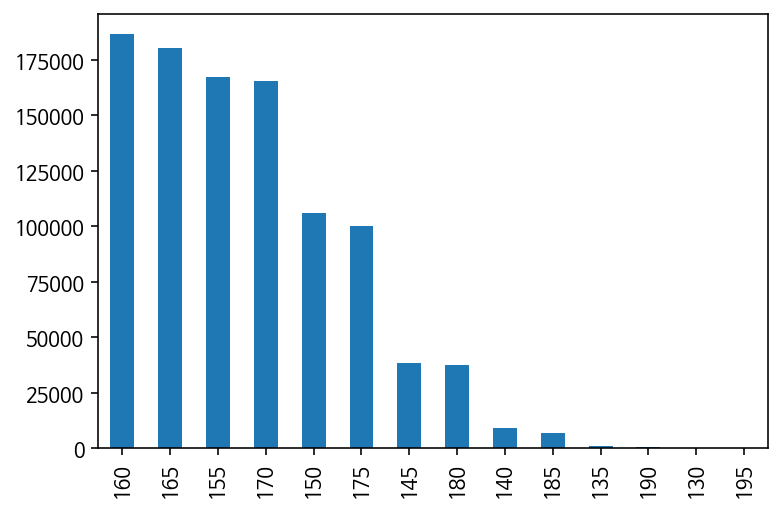

In [13]:
df["신장(5Cm단위)"].value_counts().plot.bar()

In [14]:
# Null 값을 0으로 바꿔 계산 
df["음주여부"].fillna(0).value_counts()

1.0    644900
0.0    355100
Name: 음주여부, dtype: int64

In [15]:
df.groupby(["성별코드"]).count()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,519574,519574,519574,519574,519574,519574,519553,519485,519488,519488,519488,517706,517705,517661,181877,181874,181871,176518,517655,516031,517661,517662,517661,517658,519507,401256,519574,225151,519574,519574,519574,225151,519574
2,480426,480426,480426,480426,480426,480426,480044,480320,480324,480331,480334,476870,476870,476816,151672,151670,151670,150630,476813,473663,476813,476816,476816,476812,480327,243662,480426,172529,480426,480426,480426,172529,480426


In [16]:
# 성별코드를 기준으로 신장 정보 추출
grouped = df['신장(5Cm단위)'].groupby(df['성별코드'])

In [17]:
grouped.size()

성별코드
1    519574
2    480426
Name: 신장(5Cm단위), dtype: int64

In [18]:
grouped.sum()

성별코드
1    87660235
2    74647420
Name: 신장(5Cm단위), dtype: int64

In [19]:
grouped.mean()

성별코드
1    168.715592
2    155.377561
Name: 신장(5Cm단위), dtype: float64

In [20]:
df.groupby(['성별코드']).mean()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019.0,499943.367203,34.143945,10.319872,168.715592,70.791668,85.526902,1.024732,1.025189,1.033706,1.031529,125.036051,77.789668,103.703113,193.926148,150.260928,52.945681,112.458888,15.248865,1.114997,0.976586,28.391920,31.256262,48.280724,1.653023,0.999983,0.433338,0.230108,0.620437,20191231.0
2,2019.0,500062.288321,33.245661,10.687286,155.377561,55.748398,76.768034,0.914779,0.912291,1.032321,1.031969,119.689528,73.545476,97.744361,199.295539,114.222793,61.031061,115.611206,13.169084,1.092110,0.734583,23.885191,20.286610,23.281050,1.063203,0.999955,0.359117,0.183917,0.544569,20191231.0


In [21]:
# 성별코드, 흡연상태를 기준으로 치석 정보 추출
df.groupby(["성별코드", "흡연상태"])["치석"].agg(
    ["count","mean","median","max"]
)

count      mean  median  max
성별코드 흡연상태                               
1    1.0    77718  0.569263     1.0  2.0
     2.0   147418  0.647411     1.0  2.0
2    1.0   161101  0.538165     0.0  2.0
     2.0    11407  0.634786     1.0  2.0

In [22]:
df.groupby(["성별코드", "흡연상태"])["치석"].sum(
    ["count","mean","median","max"]
)

성별코드  흡연상태
1     1.0     44242.0
      2.0     95440.0
2     1.0     86699.0
      2.0      7241.0
Name: 치석, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [24]:
# 성별별 음주여부에 따른 혈색소 상관관계 분석
df["혈색소"].fillna(0).value_counts()
pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = '음주여부',    # 행 위치에 들어갈 열
                     columns = '성별코드',    # 열 위치에 들어갈 열
                     values = '혈색소',     # 데이터로 사용할 열
                     aggfunc = ['mean','sum'])   # 데이터 집계함수
pdf1

mean                   sum           
성별코드          1          2          1          2
음주여부                                            
0.0   14.828571  13.327273      103.8      146.6
1.0   15.331374  13.199038  6140123.1  3210177.6

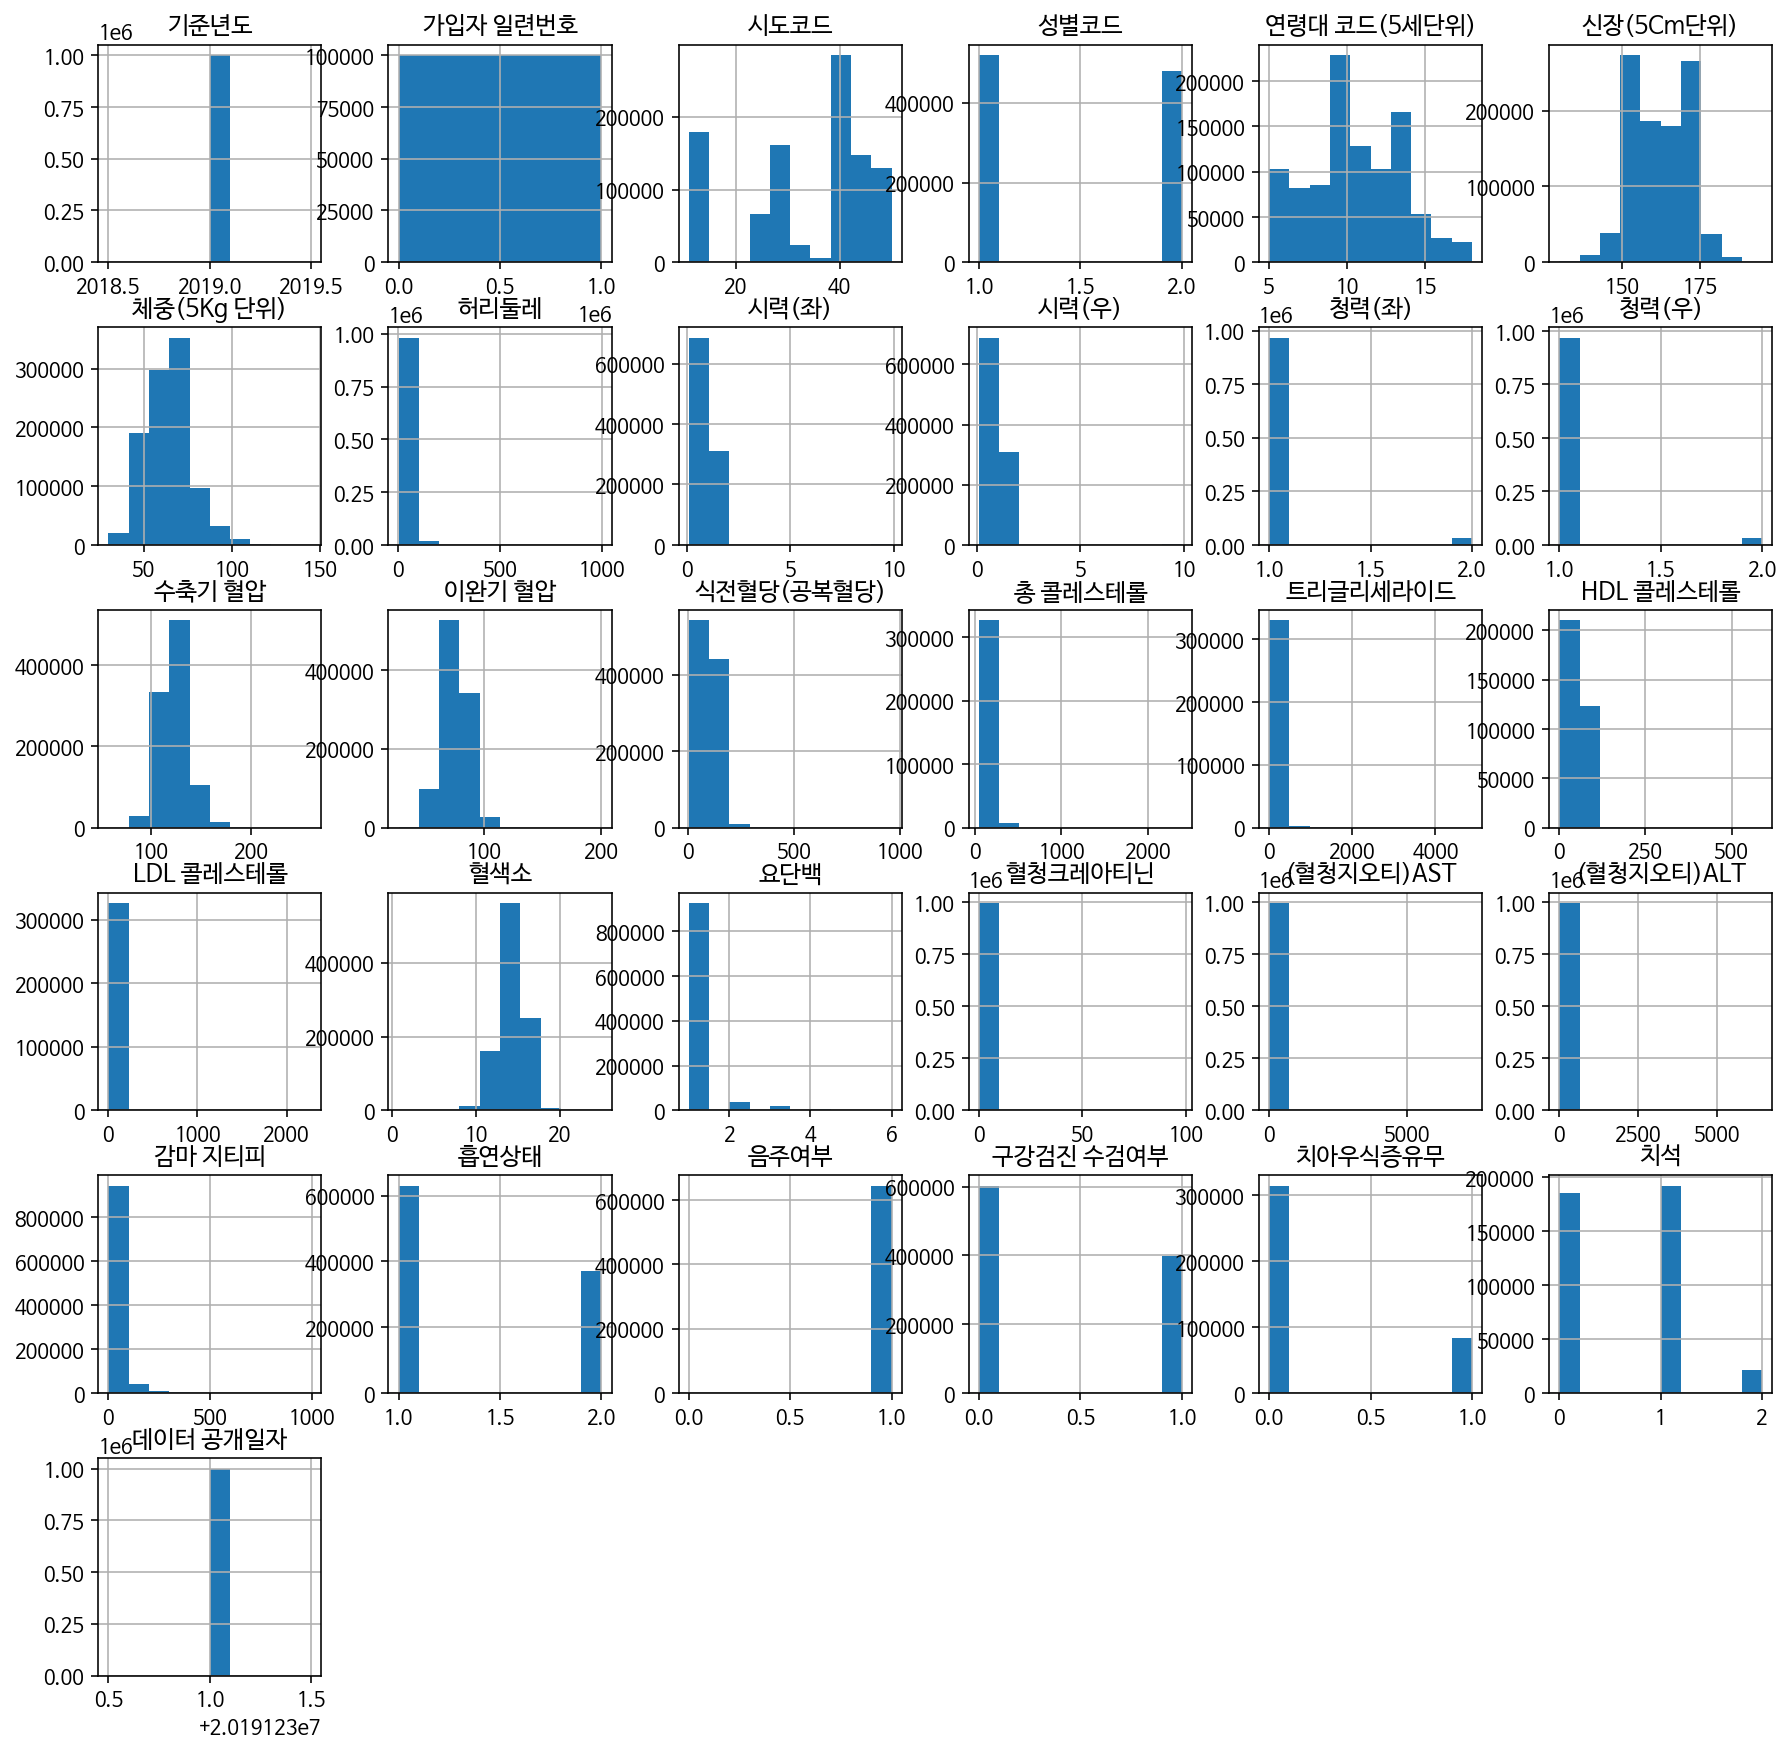

In [25]:
graph1 = df.hist(figsize=(15,15))

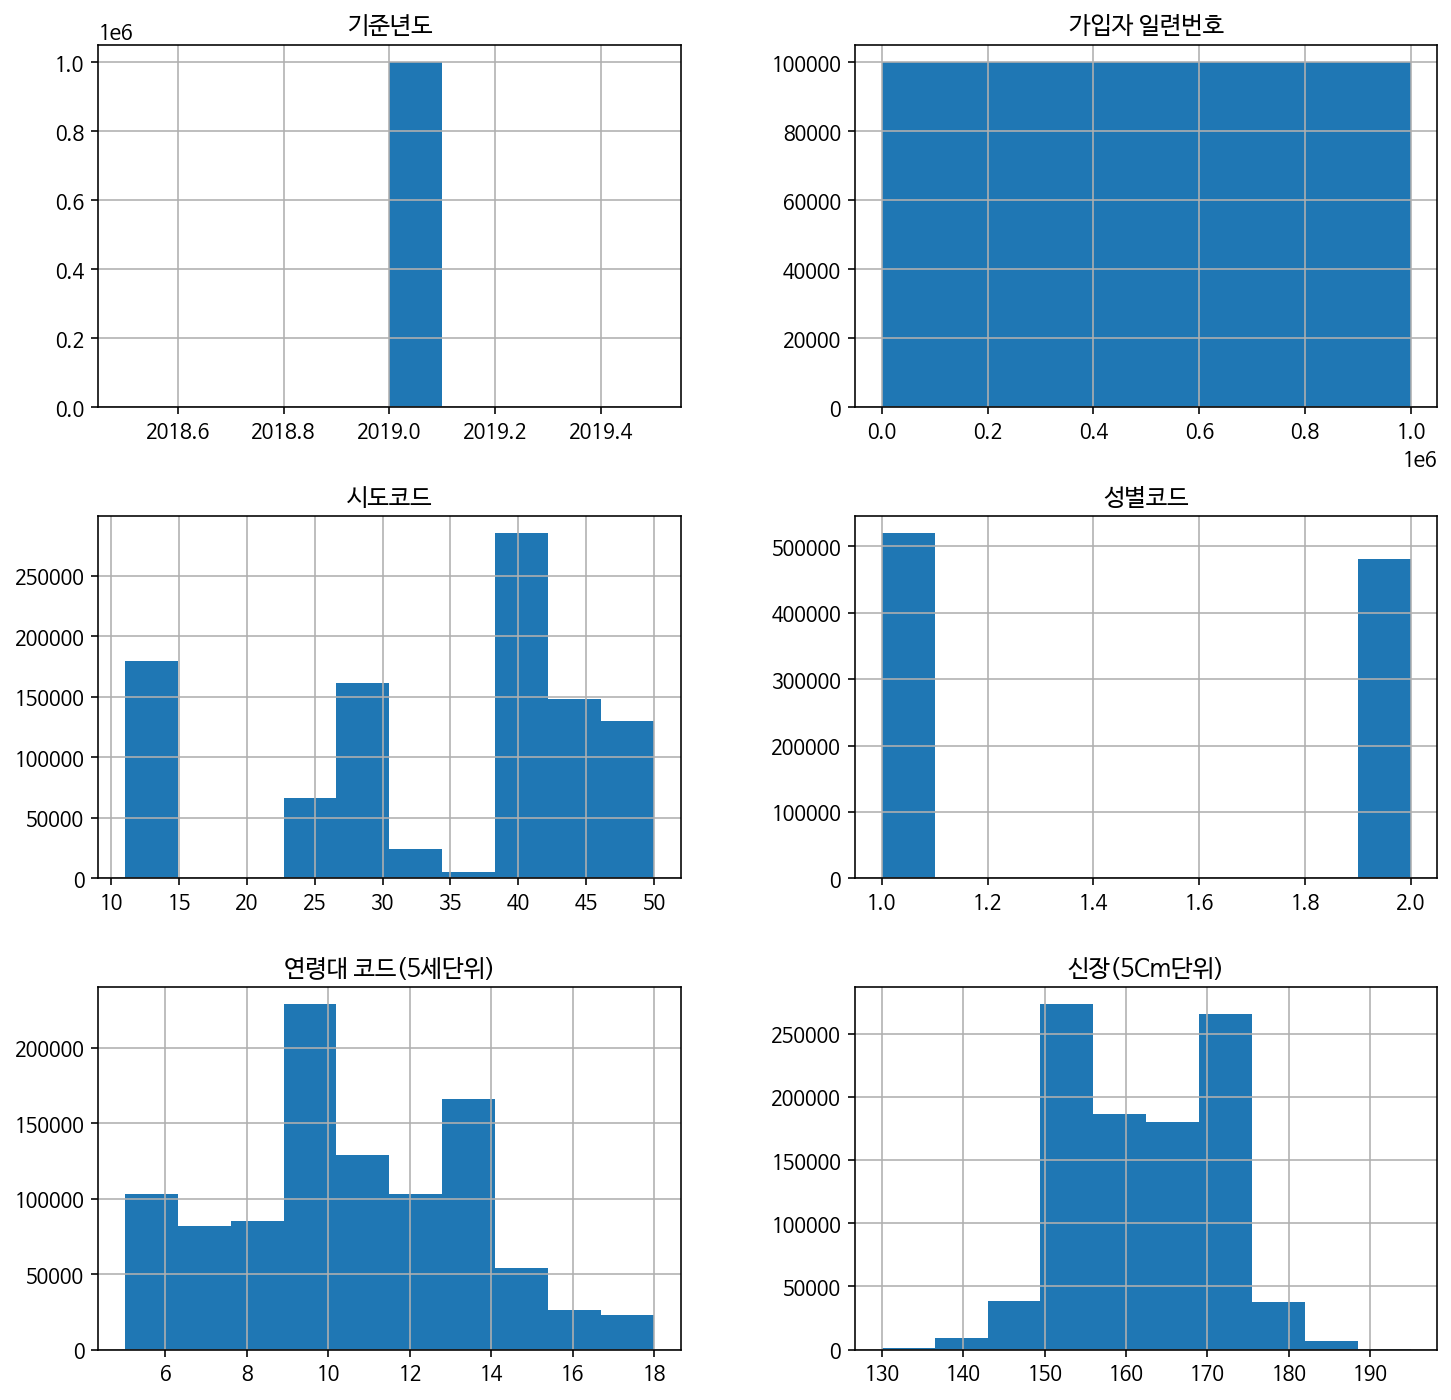

In [26]:
graph2 = df.iloc[:,:6].hist(figsize=(12,12))

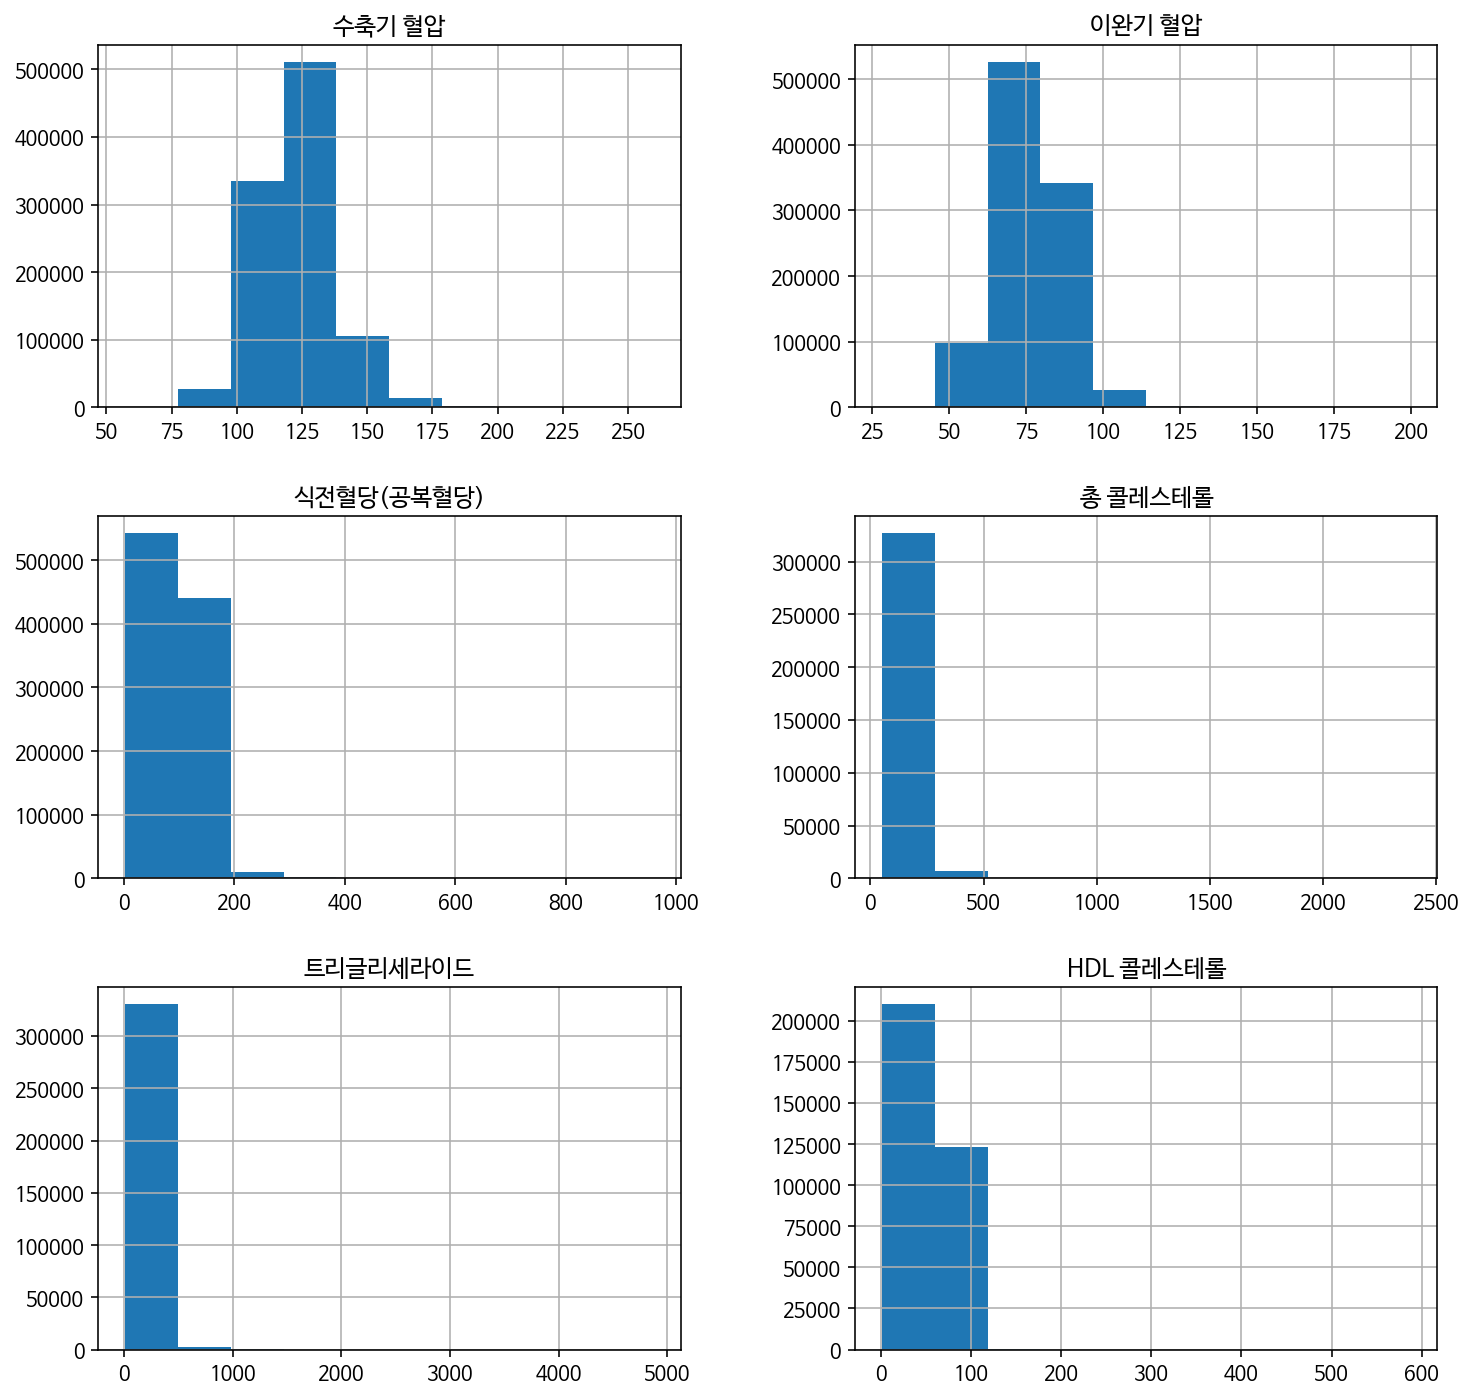

In [27]:
graph3 = df.iloc[:,12:18].hist(figsize=(12,12),bins=10)

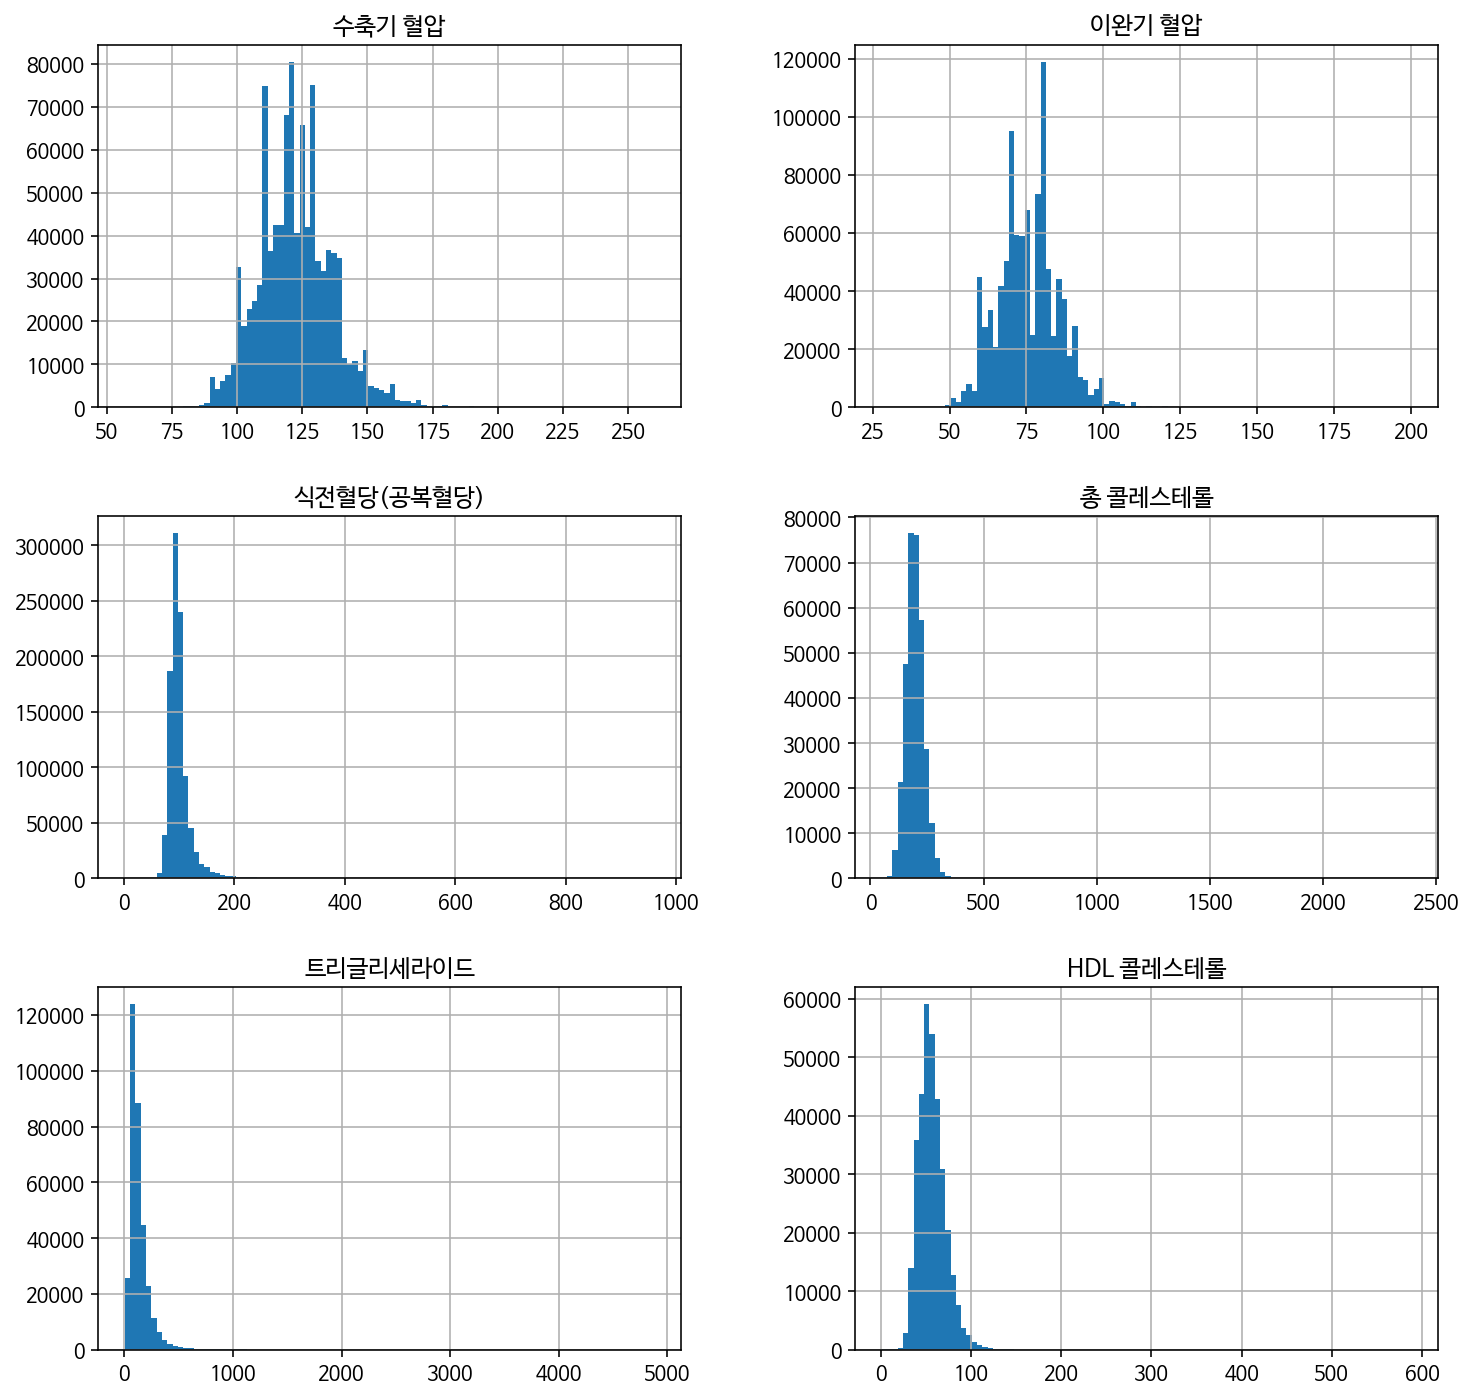

In [28]:
graph4 = df.iloc[:,12:18].hist(figsize=(12,12),bins=100)

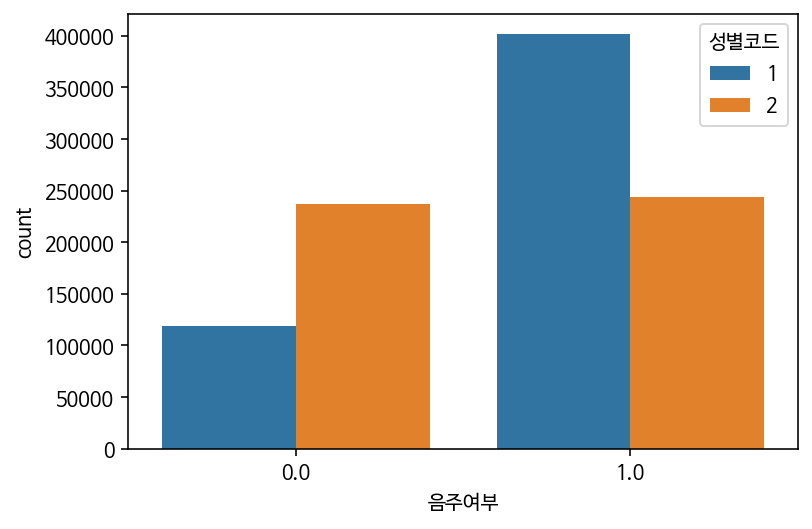

In [29]:
# seaborn
sns.countplot(data=df.fillna(0), x="음주여부", hue="성별코드")

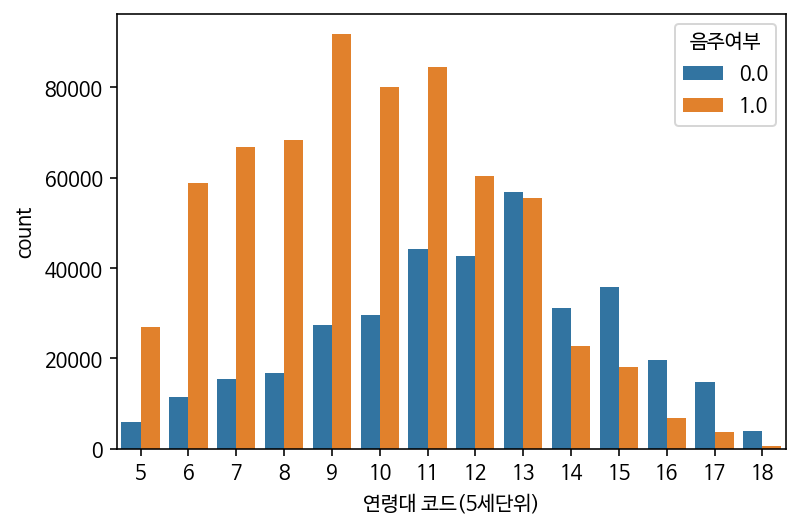

In [32]:
# 범주형 데이터
sns.countplot(data=df.fillna(0), x="연령대 코드(5세단위)", hue="음주여부")

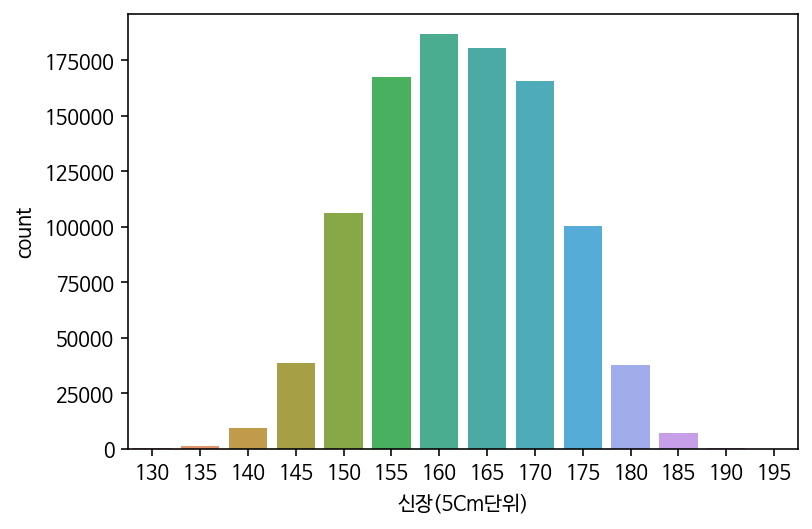

In [33]:
sns.countplot(data=df, x="신장(5Cm단위)")

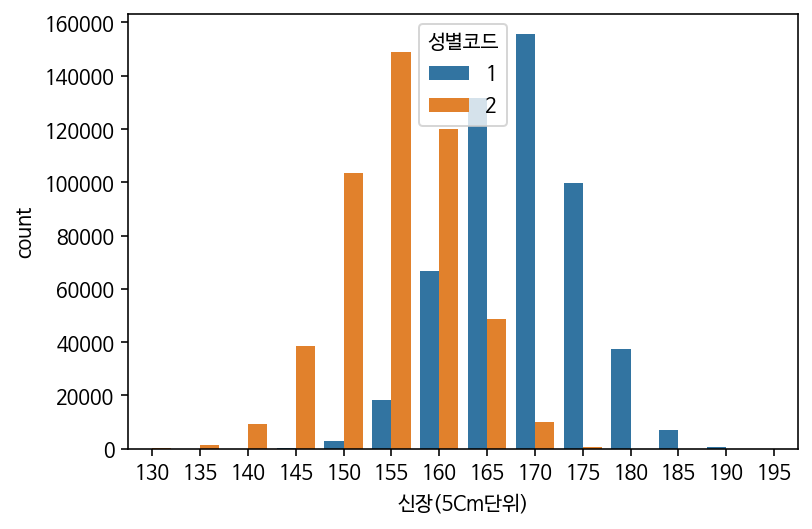

In [34]:
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

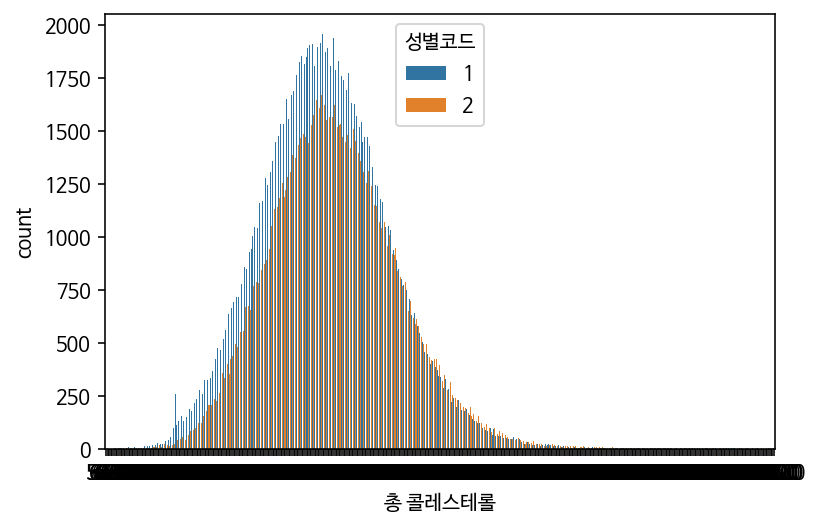

In [35]:
sns.countplot(data=df, x="총 콜레스테롤", hue="성별코드")

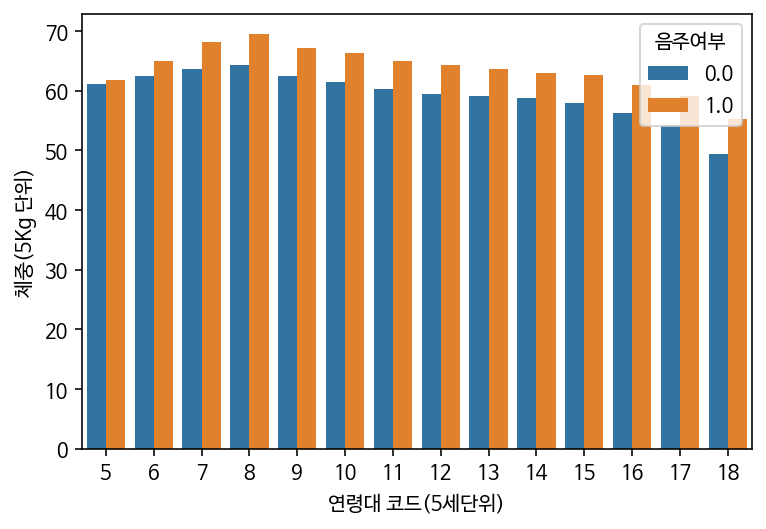

In [36]:
sns.barplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

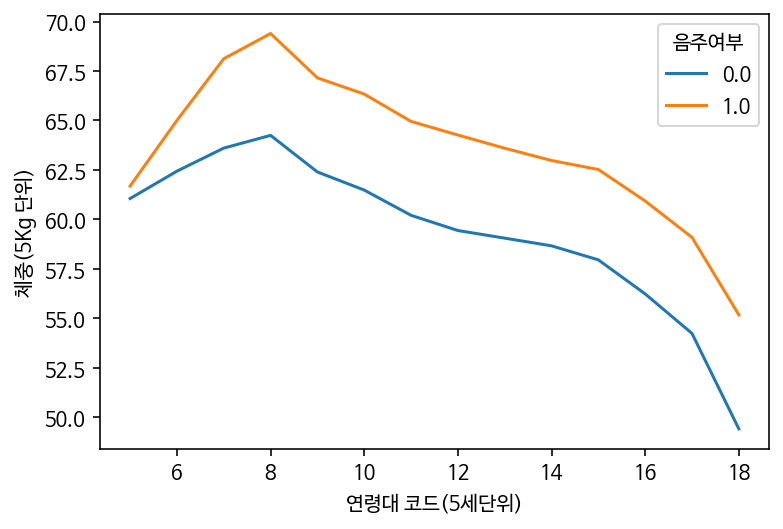

In [37]:
sns.lineplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

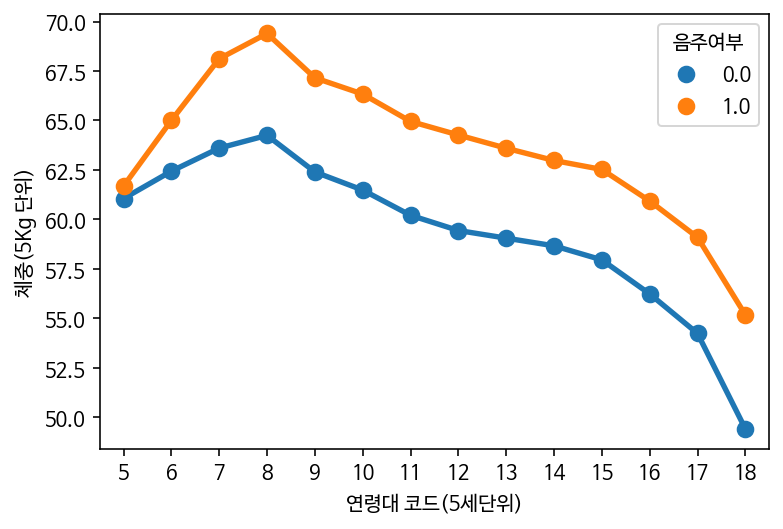

In [38]:
sns.pointplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부", ci=None)

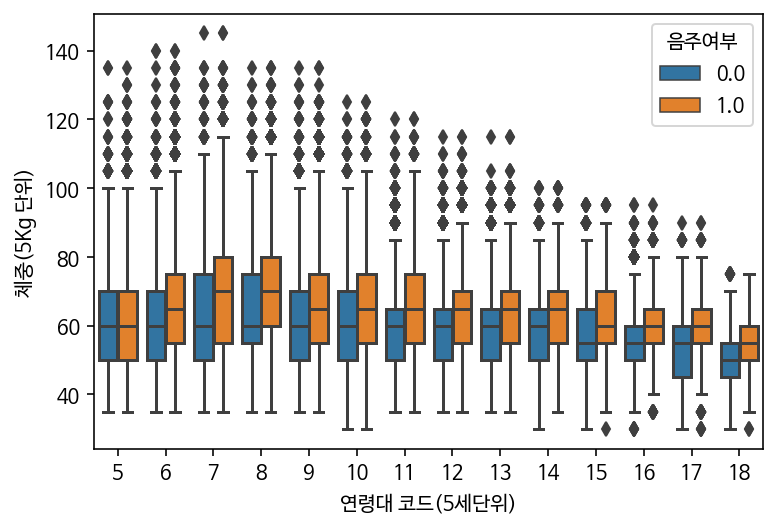

In [39]:
sns.boxplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue="음주여부")

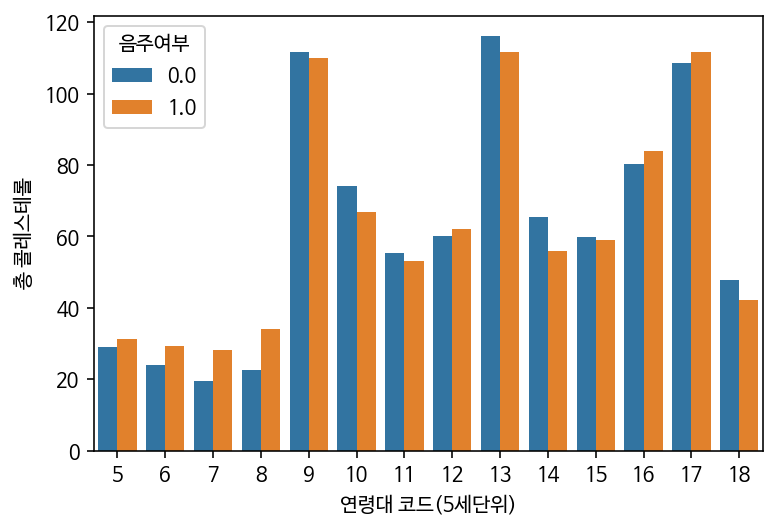

In [41]:
sns.barplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부", ci=None)

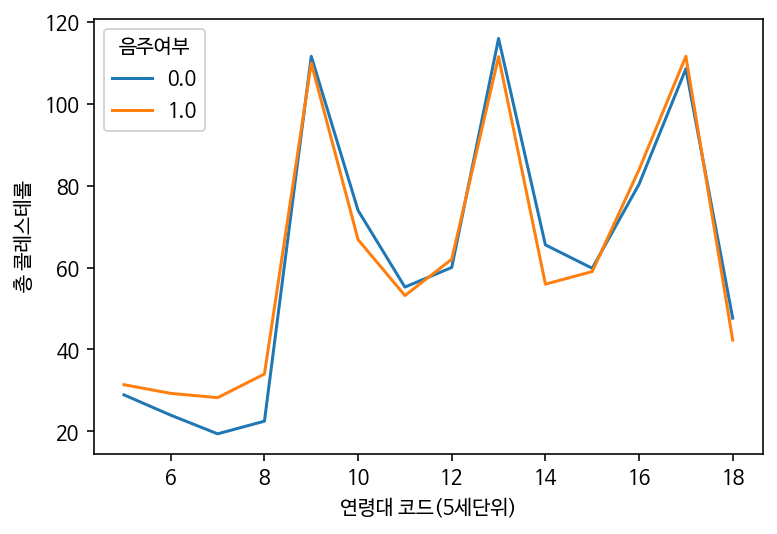

In [42]:
sns.lineplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부", ci=None)

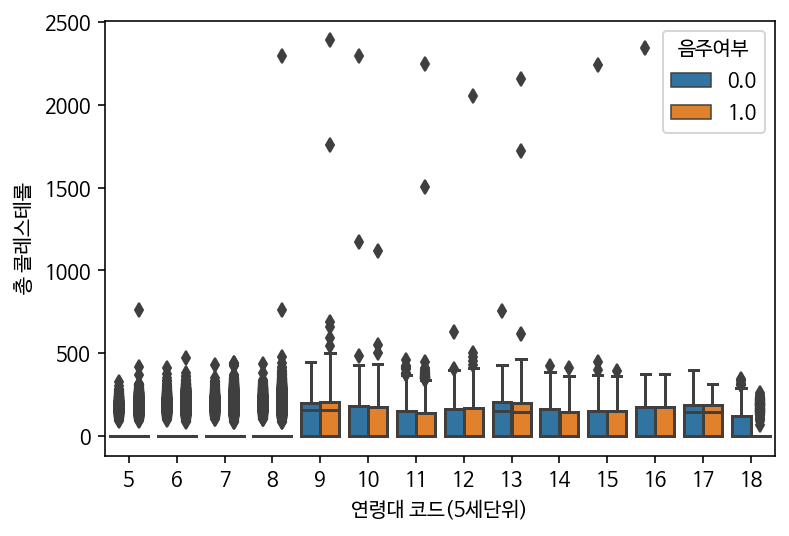

In [43]:
sns.boxplot(data=df.fillna(0), x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="음주여부")

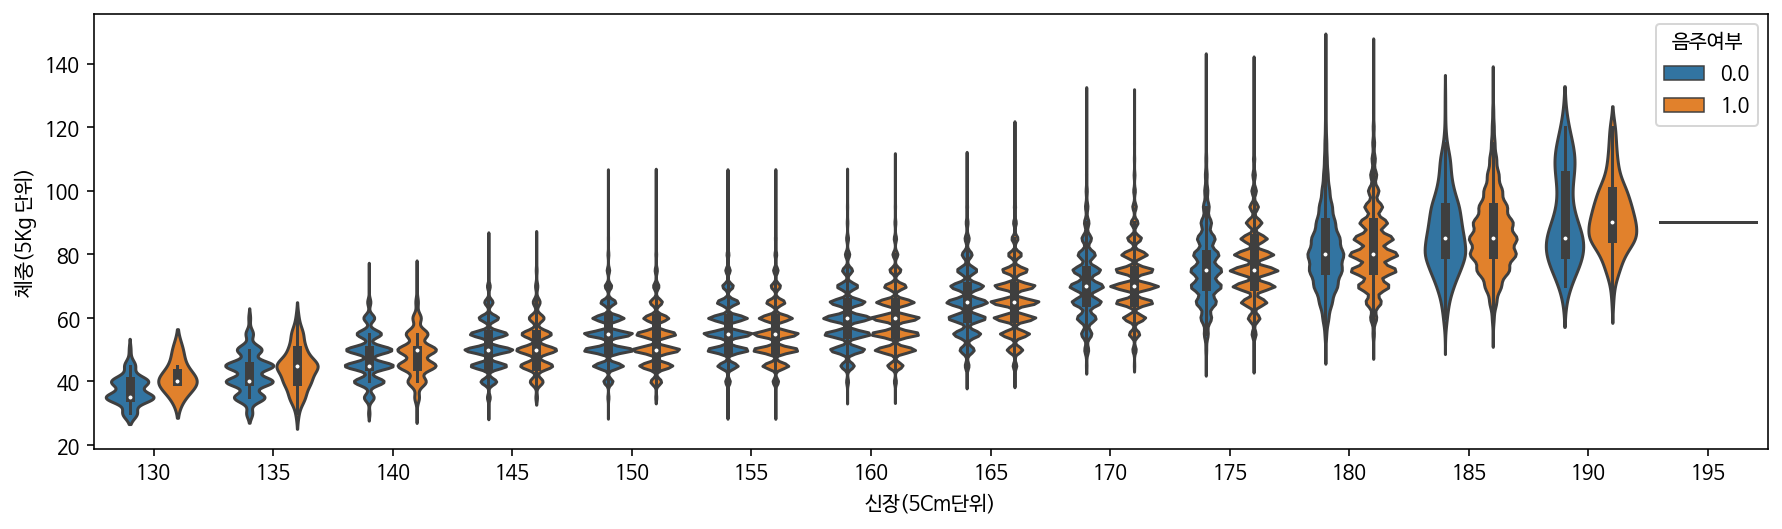

In [44]:
plt.figure(figsize=(15,4)) # figure 15x4사이즈로 생성
sns.violinplot(data=df.fillna(0), x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

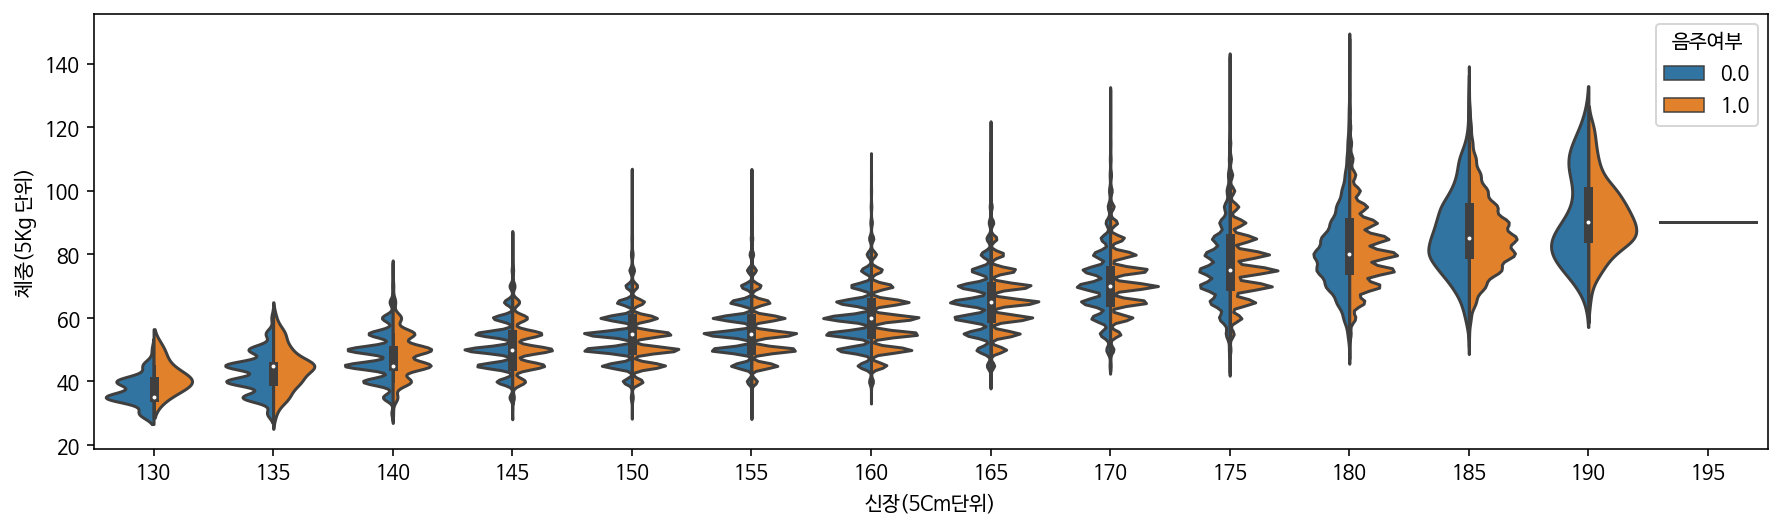

In [45]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df.fillna(0), x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부", split=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.7% of the points cannot be placed; y

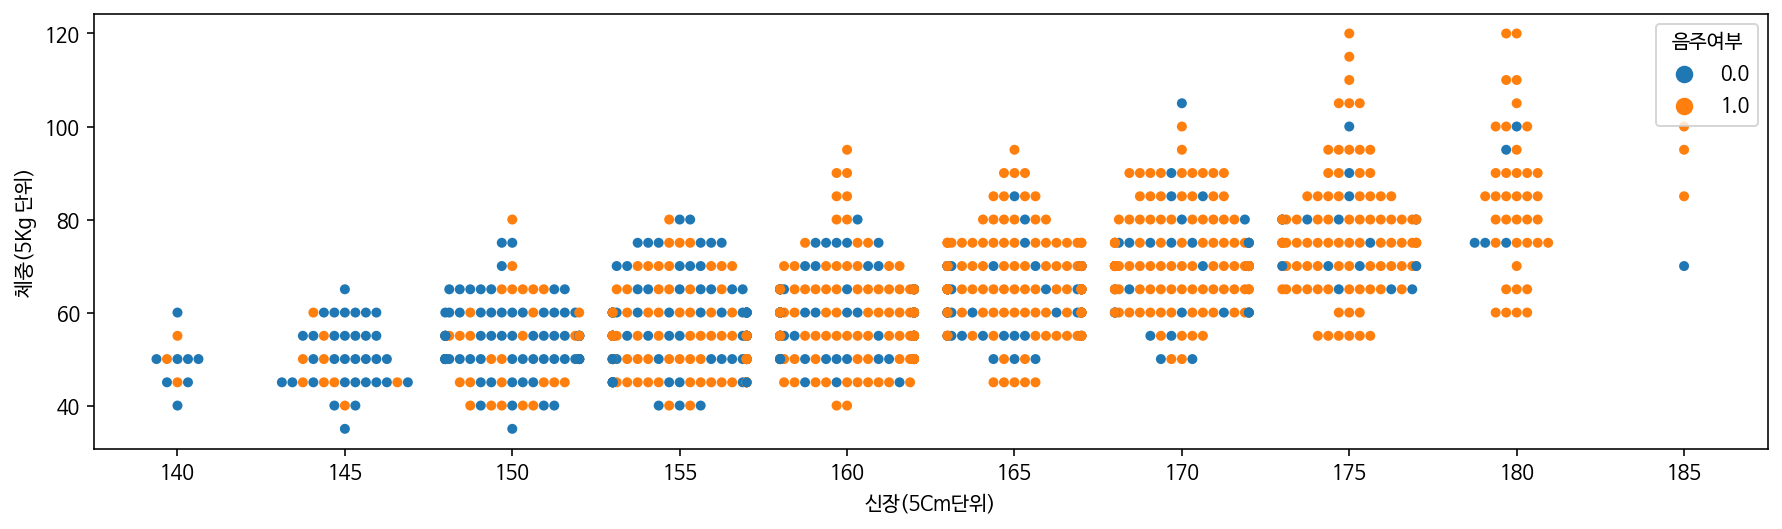

In [46]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df.sample(1000, random_state=2).fillna(0), x="신장(5Cm단위)", y="체중(5Kg 단위)", hue="음주여부")

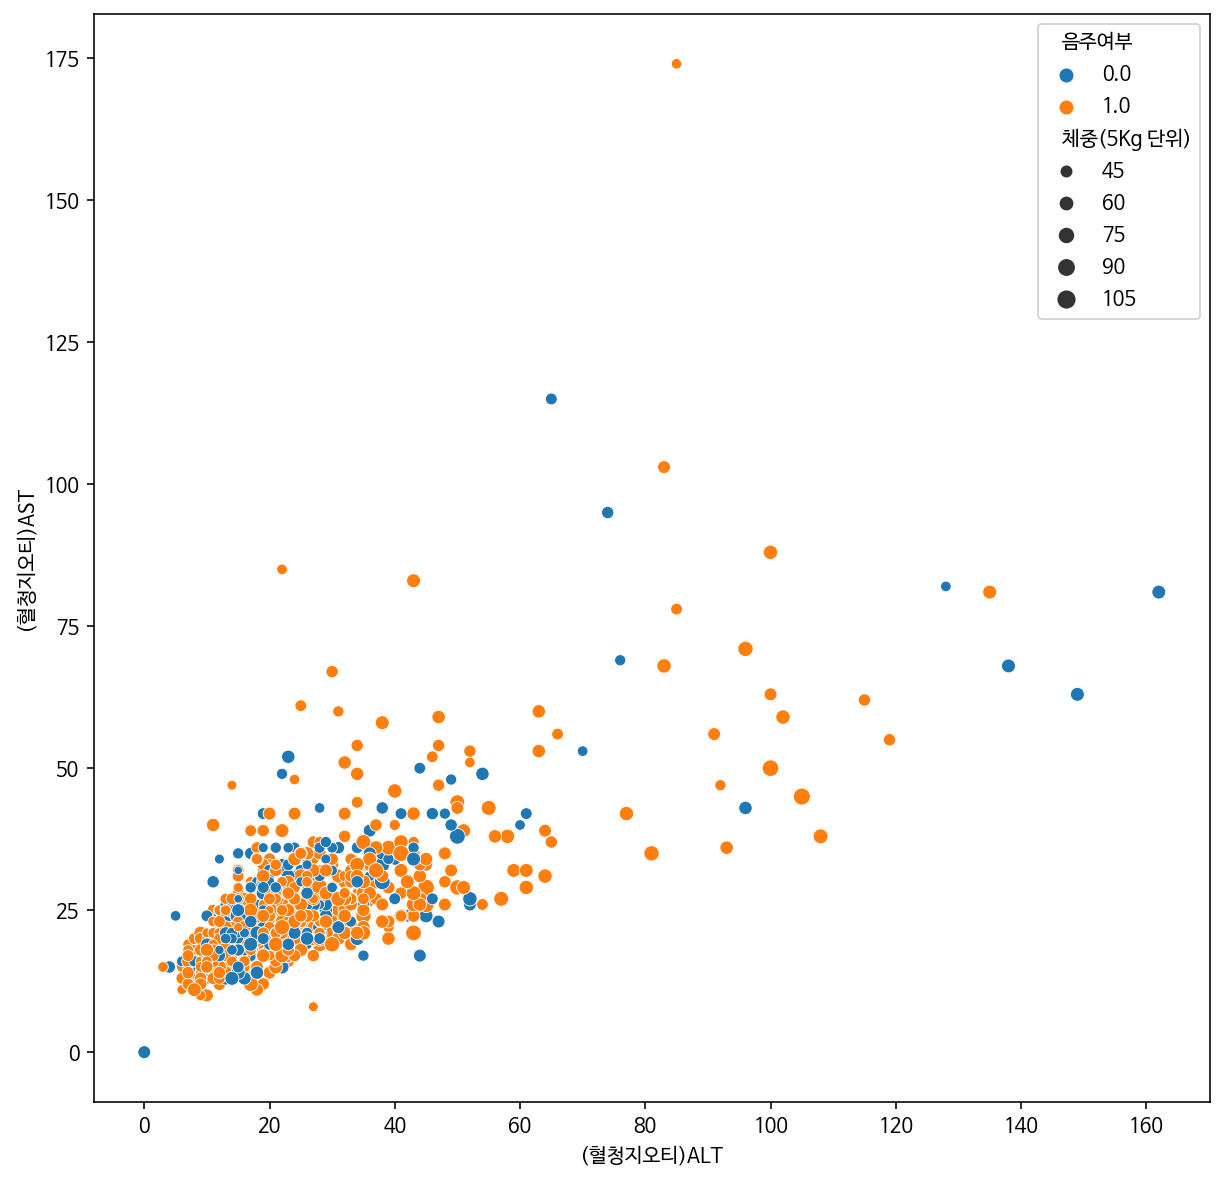

In [47]:
# 수치형 데이터
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=df.sample(1000, random_state=3).fillna(0), 
    x="(혈청지오티)ALT", 
    y="(혈청지오티)AST", 
    hue="음주여부", 
    size="체중(5Kg 단위)"
)

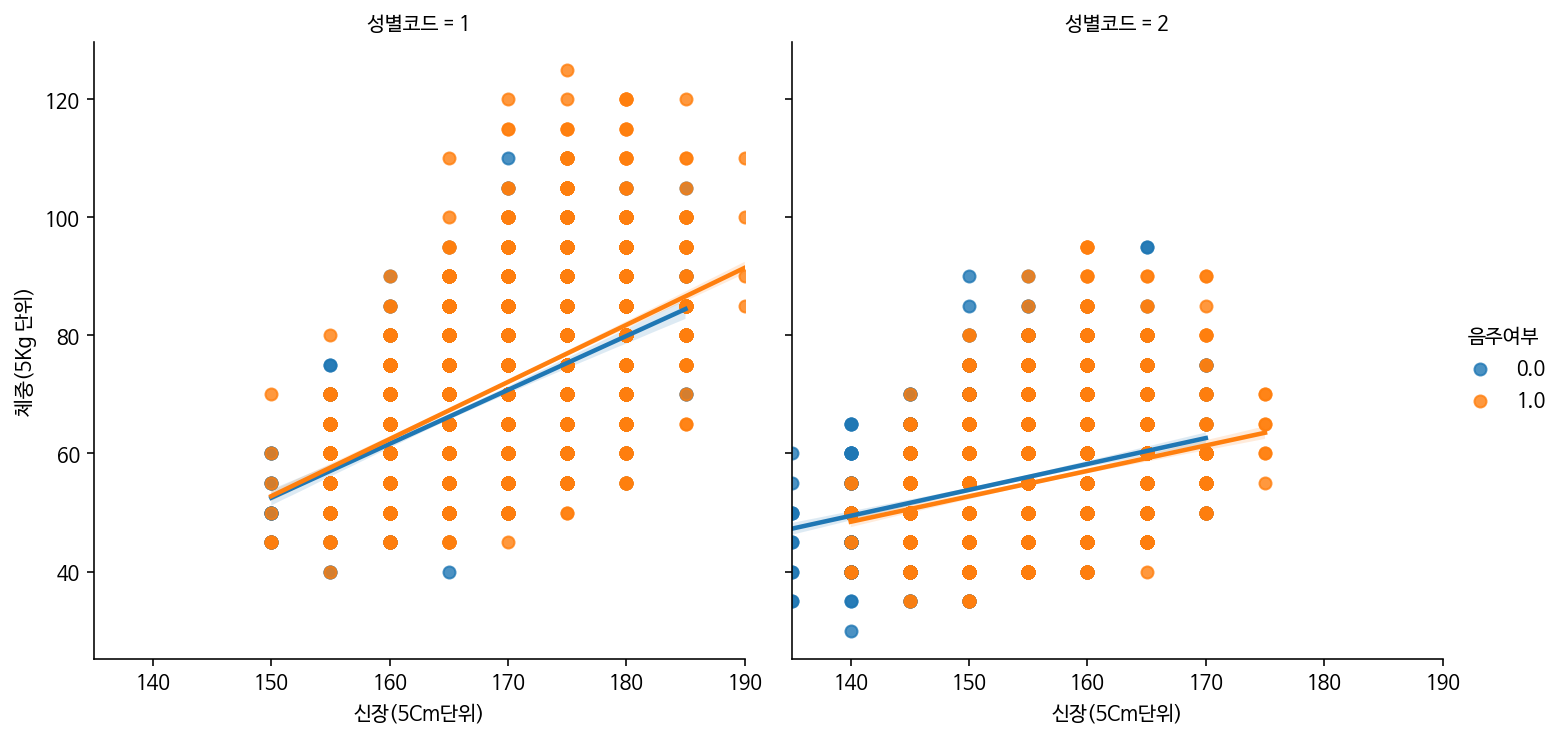

In [48]:
sns.lmplot(
    data=df.sample(10000, random_state=2).fillna(0),
    x="신장(5Cm단위)",
    y="체중(5Kg 단위)",
    hue="음주여부",
    col="성별코드"
)

KeyboardInterrupt: ignored

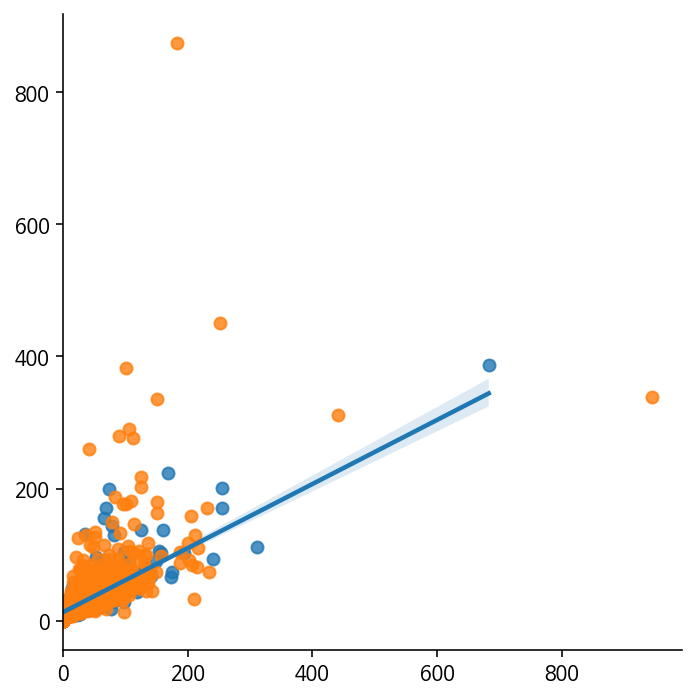

In [50]:
sns.lmplot(
    data=df.sample(10000, random_state=2).fillna(0),
    x="(혈청지오티)ALT",
    y="(혈청지오티)AST",
    hue="음주여부",
    robust=True
)
# robust -> 너무 튀는 데이터는 시각화에 좋지 않은 영향을 끼치기 때문에 제거

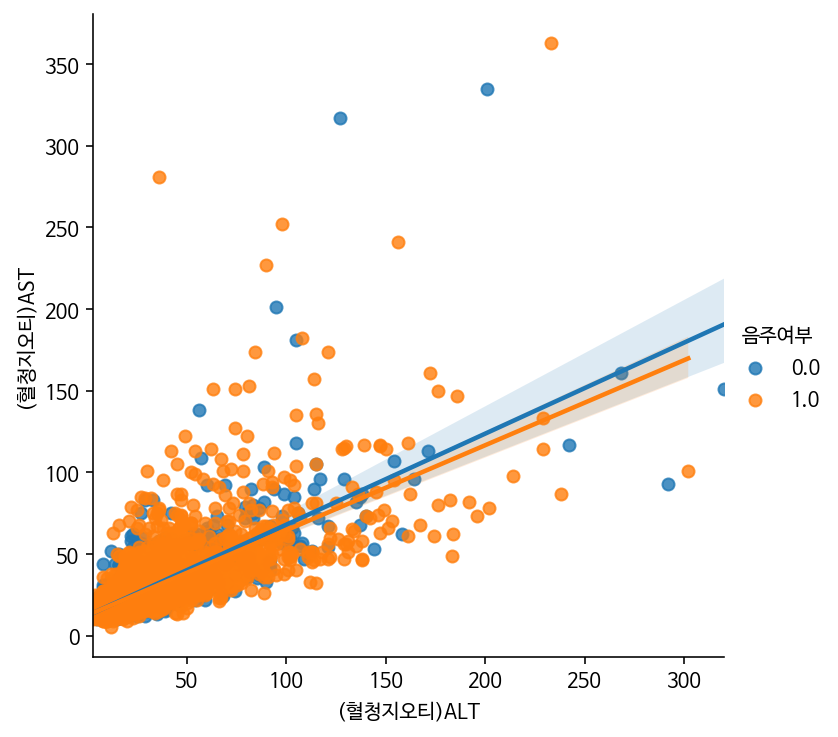

In [51]:
df_ASLT = df[(df["(혈청지오티)ALT"]<400) & (df["(혈청지오티)AST"]<400)]
df_ASLT.shape

sns.lmplot(
    data=df_ASLT.sample(10000).fillna(0),
    x="(혈청지오티)ALT",
    y="(혈청지오티)AST",
    hue="음주여부"
)

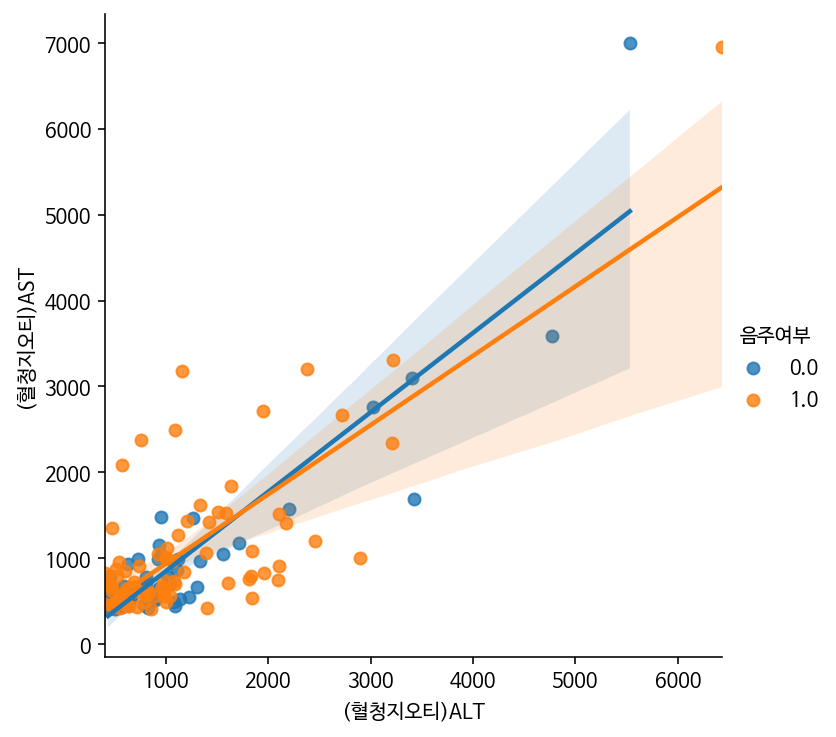

In [55]:
df_ASLT_high = df[(df["(혈청지오티)ALT"]>=400) & (df["(혈청지오티)AST"]>=400)]
df_ASLT_high.shape

sns.lmplot(
    data=df_ASLT_high.fillna(0),
    x="(혈청지오티)ALT",
    y="(혈청지오티)AST",
    hue="음주여부"
)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


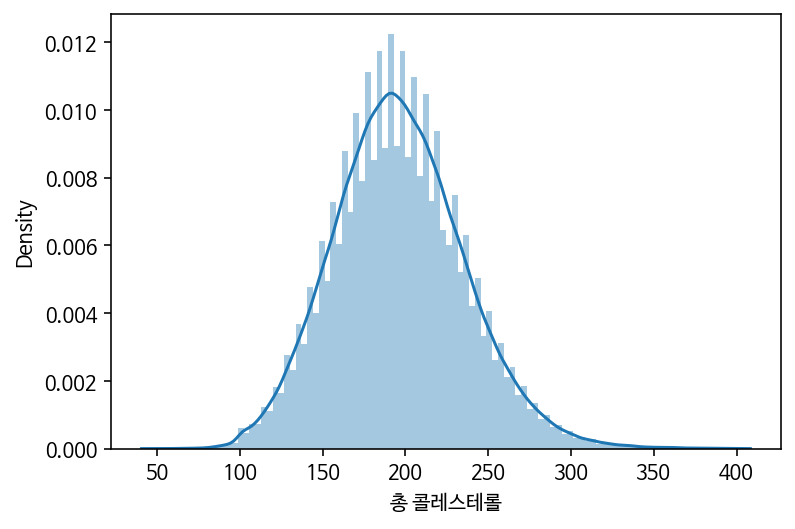

In [57]:
df_chol = df["총 콜레스테롤"][df["총 콜레스테롤"].notnull() & (df["총 콜레스테롤"]< 400)]
df_chol.shape

sns.distplot(df_chol, bins=100)

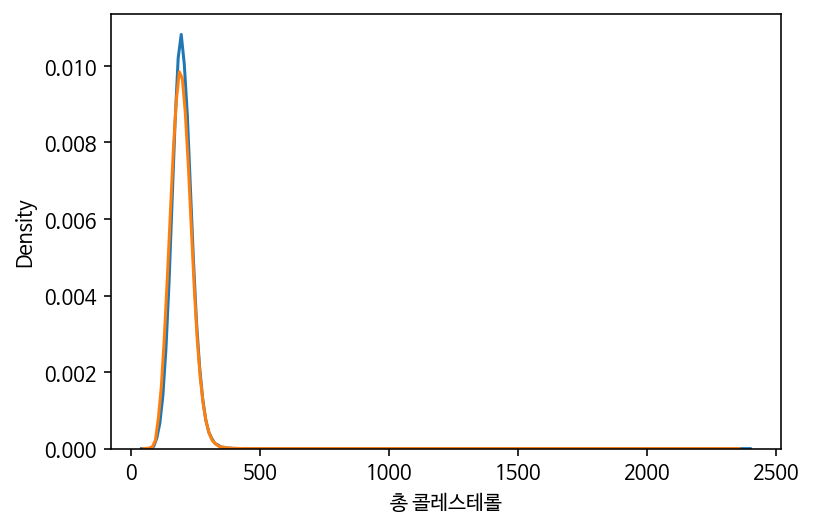

In [58]:
sns.kdeplot(df.loc[df["총 콜레스테롤"].notnull() & (df["음주여부"]==1),"총 콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[df["총 콜레스테롤"].notnull() & (df["음주여부"].fillna(0)==0),"총 콜레스테롤"], label="음주 안함")

상관분석

일반적으로
- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
로 해석한다.

In [59]:
new_columns = ['연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']
new_columns

['연령대 코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '식전혈당(공복혈당)',
 '총 콜레스테롤',
 '트리글리세라이드',
 'HDL 콜레스테롤',
 'LDL 콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마 지티피',
 '흡연상태',
 '음주여부']

In [61]:
# 상관계수 구하기
df_corr = df[new_columns].fillna(0).corr()
df_corr

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.387673,-0.192033,0.156154,-0.170121,-0.159067,0.214309,0.210237,0.168284,0.030725,0.161172,0.159026,0.117005,0.161221,0.149535,-0.194718,0.002250,0.013953,0.051857,-0.027065,0.015708,-0.047176,-0.350083
신장(5Cm단위),-0.387673,1.000000,0.668569,0.309589,0.136021,0.132671,-0.089124,-0.090862,0.068975,0.142456,0.044856,-0.028025,0.033092,-0.056768,-0.031254,0.471263,0.026231,0.180853,0.043680,0.150102,0.167271,0.463648,0.342778
체중(5Kg 단위),-0.192033,0.668569,1.000000,0.737746,0.086519,0.084340,-0.049752,-0.051095,0.237207,0.270687,0.150256,0.016427,0.111737,-0.041564,0.008603,0.430742,0.041835,0.157590,0.103595,0.274639,0.227571,0.377584,0.223874
허리둘레,0.156154,0.309589,0.737746,1.000000,0.003079,0.004815,0.040644,0.038190,0.267309,0.242925,0.199539,0.062033,0.143823,0.007077,0.051106,0.277666,0.042728,0.117467,0.113834,0.242051,0.221477,0.269499,0.052515
시력(좌),-0.170121,0.136021,0.086519,0.003079,1.000000,0.329719,-0.043003,-0.044230,-0.023579,0.010888,-0.033452,-0.024320,-0.014259,-0.027315,-0.022808,0.078038,-0.002495,0.017361,-0.003359,0.019662,0.014536,0.056057,0.083088
시력(우),-0.159067,0.132671,0.084340,0.004815,0.329719,1.000000,-0.039275,-0.040386,-0.020384,0.012118,-0.032202,-0.022260,-0.012437,-0.025033,-0.021343,0.077575,-0.007316,0.017208,-0.003223,0.019265,0.015555,0.056137,0.080083
청력(좌),0.214309,-0.089124,-0.049752,0.040644,-0.043003,-0.039275,1.000000,0.552496,0.024108,-0.024178,0.024801,0.022680,0.018620,0.023125,0.021181,-0.064155,0.005337,0.010862,0.005837,-0.014703,-0.001932,-0.007618,-0.083690
청력(우),0.210237,-0.090862,-0.051095,0.038190,-0.044230,-0.040386,0.552496,1.000000,0.023099,-0.023521,0.024269,0.022598,0.018855,0.023009,0.020684,-0.064707,0.005921,0.009520,0.005682,-0.014550,-0.001220,-0.011839,-0.084310
수축기 혈압,0.168284,0.068975,0.237207,0.267309,-0.023579,-0.020384,0.024108,0.023099,1.000000,0.797657,0.308618,0.089103,0.116858,0.071127,0.073908,0.410460,0.138129,0.123243,0.109568,0.132203,0.165268,0.099466,0.004965
이완기 혈압,0.030725,0.142456,0.270687,0.242925,0.010888,0.012118,-0.024178,-0.023521,0.797657,1.000000,0.260151,0.072786,0.108605,0.048368,0.059814,0.456356,0.121396,0.111319,0.107584,0.148543,0.185981,0.138587,0.083927


In [62]:
df_corr.loc[df_corr["신장(5Cm단위)"]>0.1, "신장(5Cm단위)"]

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.668569
허리둘레          0.309589
시력(좌)         0.136021
시력(우)         0.132671
이완기 혈압        0.142456
혈색소           0.471263
혈청크레아티닌       0.180853
(혈청지오티)ALT    0.150102
감마 지티피        0.167271
흡연상태          0.463648
음주여부          0.342778
Name: 신장(5Cm단위), dtype: float64

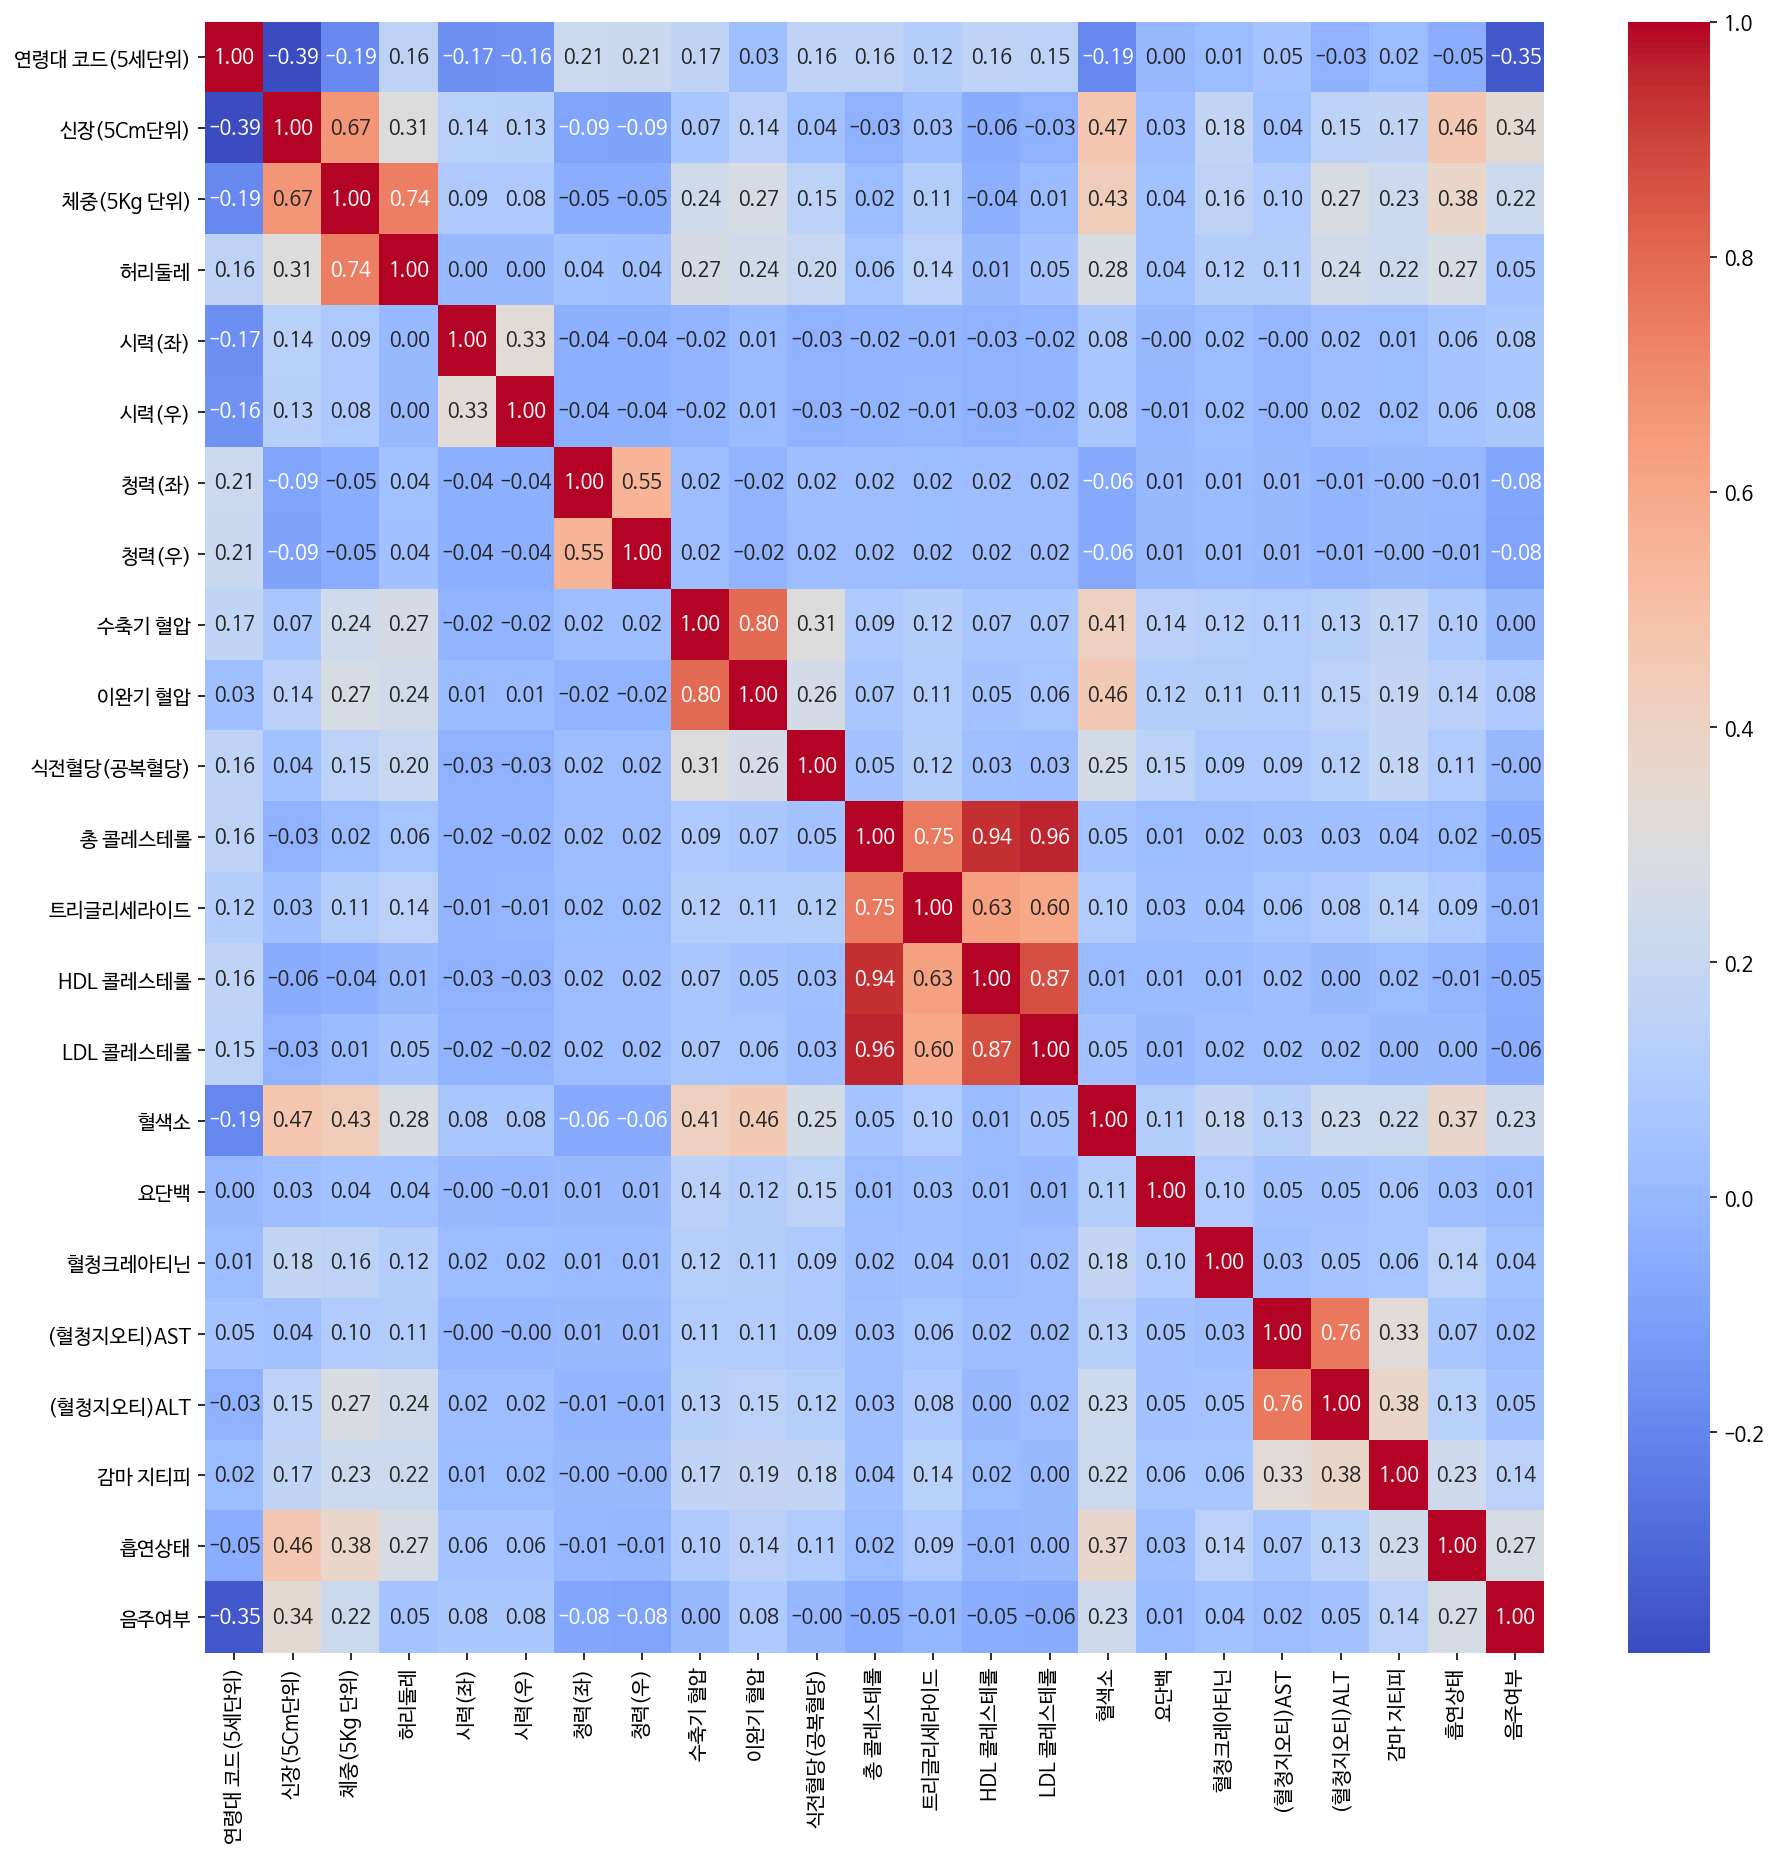

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr, annot=True, fmt=".2f", cmap="coolwarm")